Import Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load Datasets

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Basic info about Datasets

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Check for Misssing Values

In [4]:
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Descriptive Stats about the datasets

In [5]:
print("\nSummary Statistics:")
print("Customers:")
print(customers.describe(include='all'))
print("Products:")
print(products.describe(include='all'))
print("Transactions:")
print(transactions.describe())


Summary Statistics:
Customers:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
Products:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                 

EDA on Customers Dataset

C:\Users\rishi\AppData\Local\Temp\ipykernel_16768\2817000294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=customers, palette="viridis")


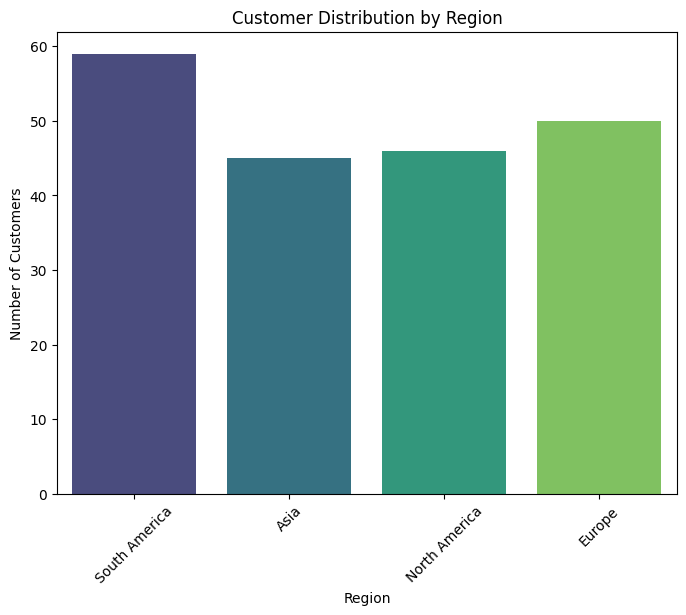

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Region", data=customers, palette="viridis")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

EDA on Products Dataset

C:\Users\rishi\AppData\Local\Temp\ipykernel_16768\90137239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=products, palette="coolwarm", order=products['Category'].value_counts().index)


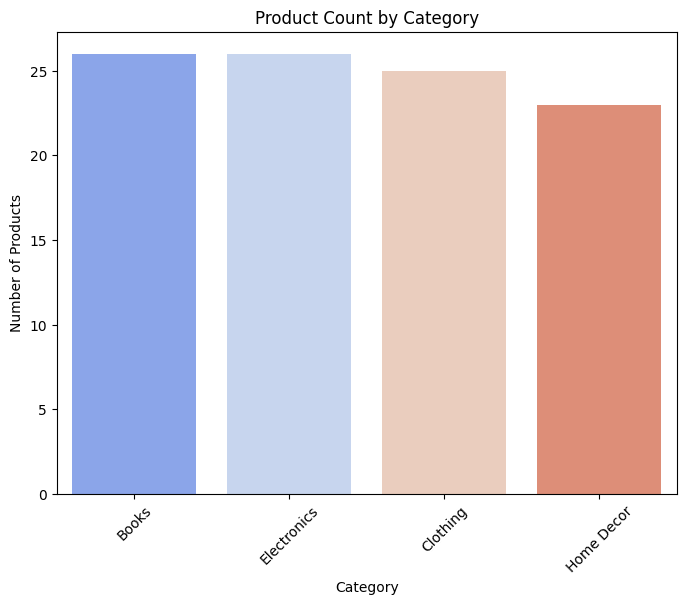

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Category", data=products, palette="coolwarm", order=products['Category'].value_counts().index)
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()


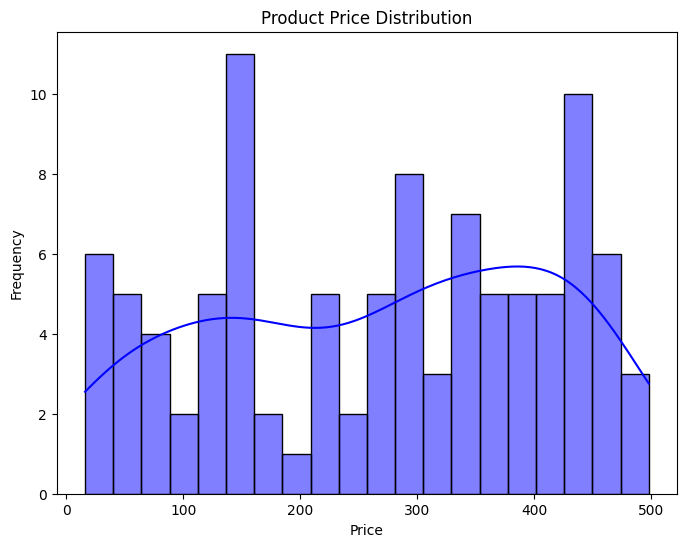

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(products['Price'], kde=True, color='blue', bins=20)
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


EDA on Transactions Dataset

In [9]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period("M")

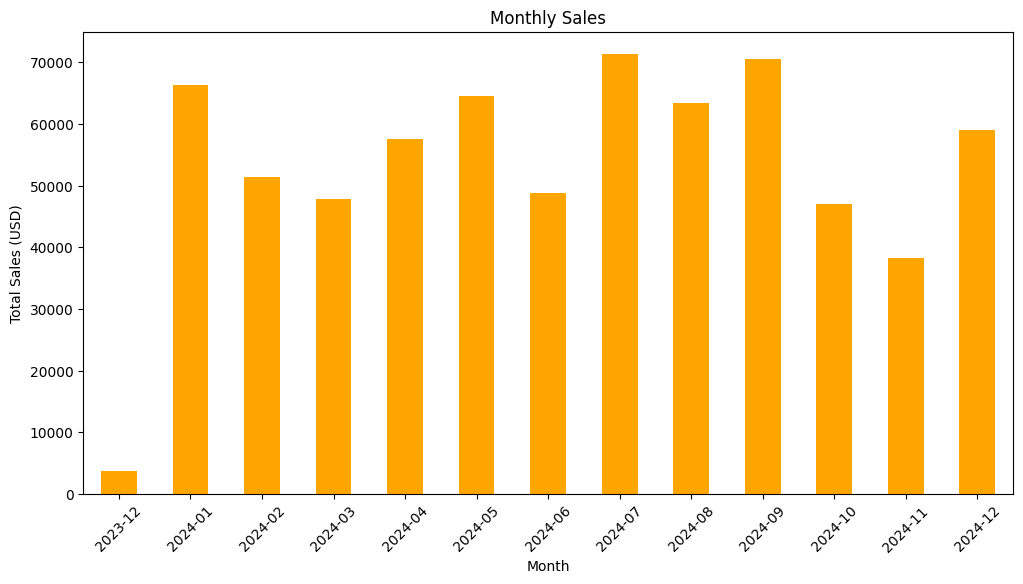

In [10]:
plt.figure(figsize=(12, 6))
monthly_sales = transactions.groupby("Month")["TotalValue"].sum()
monthly_sales.plot(kind="bar", color="orange")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

Merging the datasets for more insights

In [11]:
merged = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged = pd.merge(merged, products, on="ProductID", how="inner")

Top 5 customers by total spending

In [12]:
top_customers = merged.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers)


Top 5 Customers by Total Spending:
CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


Top 5 products by sales

In [13]:
top_products = merged.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold:")
print(top_products)


Top 5 Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


Sales distribution by Region

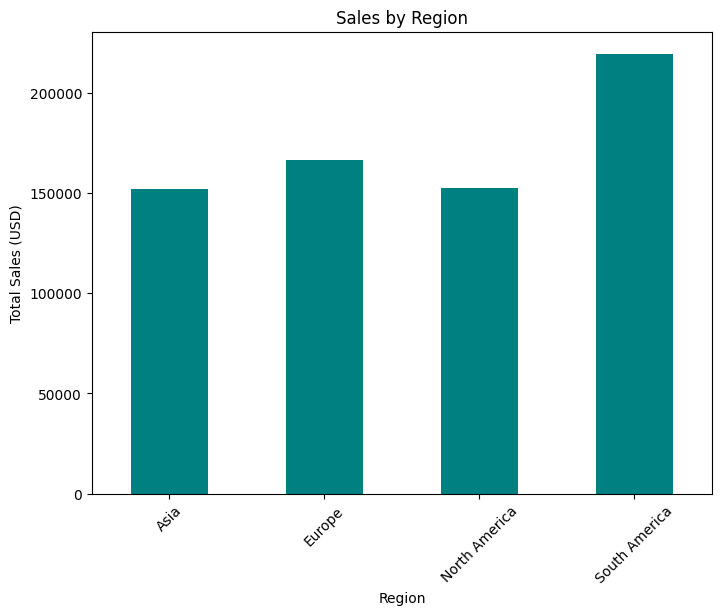

In [14]:
plt.figure(figsize=(8, 6))
region_sales = merged.groupby("Region")["TotalValue"].sum()
region_sales.plot(kind="bar", color="teal")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()